<a href="https://colab.research.google.com/github/Csb4658/Csb4658/blob/main/Employee_Salary_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv('adult 3.csv')

In [8]:
df.head()
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [12]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.shape
df.size

678330

In [14]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [15]:
X = df.drop('income', axis=1)
y = df['income']

In [16]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Original income categories: {le.classes_}")
print(f"Encoded income mapping: {list(le.classes_)}")

Original income categories: ['<=50K' '>50K']
Encoded income mapping: ['<=50K', '>50K']


In [17]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

print("\nData loading and preprocessing complete. X and y prepared.")


Data loading and preprocessing complete. X and y prepared.


In [19]:
from sklearn.ensemble import RandomForestClassifier

# --- Model Pipeline Definition ---
# Create a pipeline that first applies the preprocessor (OneHotEncoder for categorical, passthrough for numerical)
# and then feeds the transformed data into the RandomForestClassifier.
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

print("Model pipeline (Preprocessor + RandomForestClassifier) defined.")

Model pipeline (Preprocessor + RandomForestClassifier) defined.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and testing sets.
X_train shape: (36177, 14), y_train shape: (36177,)
X_test shape: (9045, 14), y_test shape: (9045,)


In [21]:
# --- Model Training ---
print("\nStarting model training...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- Model Prediction ---
print("Generating predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions generated.")


Starting model training...
Model training complete.
Generating predictions on the test set...
Predictions generated.



--- Model Evaluation ---
Accuracy: 0.8524

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.73      0.62      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



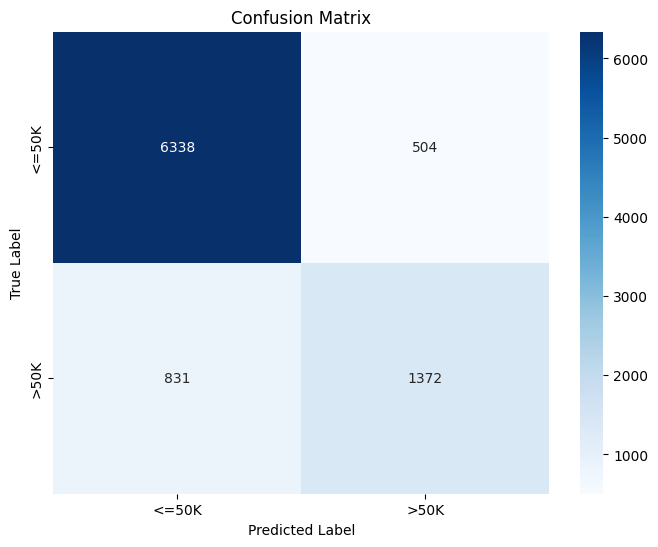

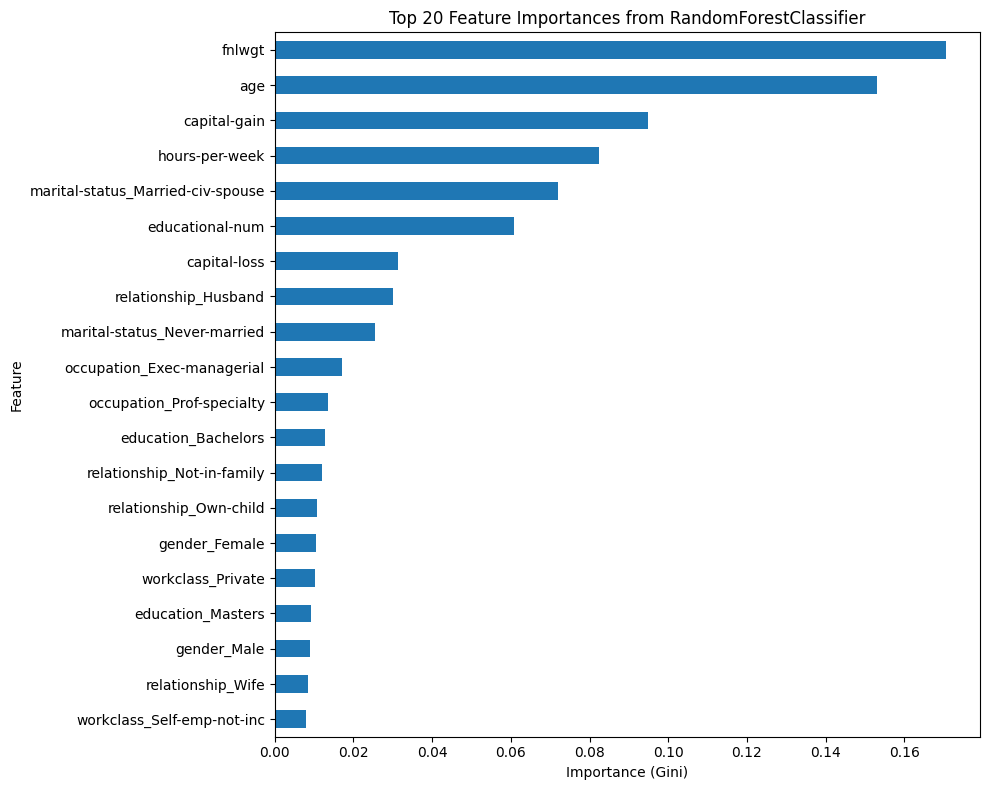


Model evaluation and visualizations complete.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Model Evaluation ---
print("\n--- Model Evaluation ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ohe_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_feature_names, numerical_features])

feature_importances = model.named_steps['classifier'].feature_importances_


importances_df = pd.Series(feature_importances, index=all_feature_names)

top_n = 20
plt.figure(figsize=(10, 8))
importances_df.nlargest(top_n).plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances from RandomForestClassifier')
plt.xlabel('Importance (Gini)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nModel evaluation and visualizations complete.")

In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder


try:
    model = joblib.load('salary_prediction_model_lgbm.pkl')
    le = LabelEncoder()
    le.fit(['<=50K', '>50K'])
    st.success("Model loaded successfully!")
except FileNotFoundError:
    st.error("Error: Model file 'salary_prediction_model_lgbm.pkl' not found. Please train and save the model first.")
    st.stop()


# --- Streamlit App Layout ---
st.set_page_config(page_title="Employee Salary Prediction", layout="wide")

st.title("💰 Employee Salary Prediction (Income Bracket)")
st.markdown("""
    This application predicts whether an individual's income is **<=50K** or **>50K**
    based on various demographic and work-related attributes.
""")

st.sidebar.header("User Input Features")

# --- Function to get user input ---
def get_user_input():

    workclass_options = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay']
    education_options = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm',
                         '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
    marital_status_options = ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed',
                              'Married-spouse-absent', 'Married-AF-spouse']
    occupation_options = ['Craft-repair', 'Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales',
                          'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners',
                          'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
    relationship_options = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
    race_options = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
    gender_options = ['Male', 'Female']
    native_country_options = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico', 'Canada',
                              'El-Salvador', 'India', 'Cuba', 'England', 'China', 'Jamaica', 'South', 'Italy',
                              'Dominican-Republic', 'Japan', 'Guatemala', 'Vietnam', 'Columbia', 'Poland',
                              'Haiti', 'Portugal', 'Iran', 'Taiwan', 'Greece', 'Nicaragua', 'Peru', 'Ecuador',
                              'France', 'Ireland', 'Thailand', 'Hong', 'Cambodia', 'Trinadad&Tobago', 'Yugoslavia',
                              'Outlying-US(Guam-USVI-etc)', 'Laos', 'Scotland', 'Honduras', 'Hungary',
                              'Holand-Netherlands']

    age = st.sidebar.slider("Age", 17, 90, 35)
    workclass = st.sidebar.selectbox("Workclass", workclass_options)
    fnlwgt = st.sidebar.number_input("Final Weight (fnlwgt)", min_value=13492, max_value=1490400, value=189734)
    education = st.sidebar.selectbox("Education", education_options)
    educational_num = st.sidebar.slider("Educational Num (Years of Education)", 1, 16, 10)
    marital_status = st.sidebar.selectbox("Marital Status", marital_status_options)
    occupation = st.sidebar.selectbox("Occupation", occupation_options)
    relationship = st.sidebar.selectbox("Relationship", relationship_options)
    race = st.sidebar.selectbox("Race", race_options)
    gender = st.sidebar.selectbox("Gender", gender_options)
    capital_gain = st.sidebar.number_input("Capital Gain", min_value=0, max_value=99999, value=0)
    capital_loss = st.sidebar.number_input("Capital Loss", min_value=0, max_value=4356, value=0)
    hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
    native_country = st.sidebar.selectbox("Native Country", native_country_options)

    data = {
        'age': age,
        'workclass': workclass,
        'fnlwgt': fnlwgt,
        'education': education,
        'educational-num': educational_num,
        'marital-status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'gender': gender,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours_per_week,
        'native-country': native_country
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = get_user_input()

st.subheader("User Input Features")
st.write(input_df)


if st.button("Predict Income"):
    prediction_encoded = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    prediction_label = le.inverse_transform(prediction_encoded)

    st.subheader("Prediction Result")
    if prediction_label[0] == '>50K':
        st.success(f"Based on the provided features, the predicted income is: **{prediction_label[0]}** 🎉")
    else:
        st.info(f"Based on the provided features, the predicted income is: **{prediction_label[0]}**")

    st.subheader("Prediction Probability")
    proba_df = pd.DataFrame(prediction_proba, columns=le.classes_)
    st.write(proba_df)

    st.markdown("""
    **Interpretation of Probability:**
    - The first column (`<=50K`) shows the probability of income being less than or equal to 50K.
    - The second column (`>50K`) shows the probability of income being greater than 50K.
    """)

st.markdown("""
---
**About the Model:**
This application uses a LightGBM Classifier trained on the Adult Income dataset.
""")

Writing app.py


In [28]:
!pip install streamlit pyngrok lightgbm

In [30]:
from google.colab import files

print("Please upload 'adult 3.csv':")
uploaded_data = files.upload()

print("\nPlease upload 'salary_prediction_model_lgbm.pkl':")
uploaded_model = files.upload()

print("\nAll files uploaded!")

Please upload 'adult 3.csv':


Saving adult 3.csv to adult 3 (2).csv

Please upload 'salary_prediction_model_lgbm.pkl':


Saving Employee_Salary_prediction_.ipynb to Employee_Salary_prediction_.ipynb

All files uploaded!


In [32]:
from pyngrok import ngrok
ngrok.set_auth_token("30F4oMHgeGPh9xgsc3AoaUcj8ob_2W5jbakFg911CbX1uijJM")

In [33]:
!nohup streamlit run app.py &

import time
time.sleep(4)
from pyngrok import ngrok
ngrok.kill()

url = ngrok.connect(8501)
print(f"Your Streamlit app is live at: {url}")

nohup: appending output to 'nohup.out'
Your Streamlit app is live at: NgrokTunnel: "https://79b99419313c.ngrok-free.app" -> "http://localhost:8501"
